## **Nicolas Greenhill**

## Libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


In [174]:
df = pd.read_csv('/Users/nico/Desktop/Python/google_analytis.csv')

In [175]:
df.shape

(12330, 18)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [177]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8626,0,0.000000,0,0.0,6,85.750000,0.000000,0.050000,0.000000,0.0,Nov,2,4,1,2,Returning_Visitor,False,False
581,0,0.000000,1,15.0,25,1235.650000,0.041667,0.053274,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,True,False
3407,15,168.429198,2,10.0,98,2806.829918,0.013145,0.039029,0.546128,0.0,May,2,2,3,2,Returning_Visitor,True,False
9738,0,0.000000,0,0.0,19,2177.333333,0.000000,0.010526,0.000000,0.0,Dec,2,4,1,2,New_Visitor,False,False
1373,0,0.000000,0,0.0,5,182.000000,0.000000,0.040000,0.000000,0.0,Mar,3,2,6,1,Returning_Visitor,False,False
5082,1,0.000000,1,37.4,23,1146.500000,0.015385,0.023077,72.520769,0.0,May,2,4,1,4,Returning_Visitor,True,True
3332,1,47.000000,0,0.0,19,881.166667,0.000000,0.005882,0.000000,0.0,May,2,2,6,4,New_Visitor,False,False
4947,2,11.000000,0,0.0,48,2562.083333,0.004255,0.005319,0.000000,0.0,May,2,5,7,4,Returning_Visitor,False,False
9702,0,0.000000,0,0.0,8,210.400000,0.000000,0.050000,0.000000,0.0,Nov,1,1,3,8,New_Visitor,True,False
4496,2,820.000000,0,0.0,28,2228.516667,0.000000,0.008025,42.503333,0.0,May,2,2,9,2,Returning_Visitor,False,False


### 2. Identify and handle missing values or duplicates

In [178]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [179]:
df.duplicated().sum()

np.int64(125)

In [180]:
df.drop_duplicates(inplace=True)

In [181]:
df.duplicated().sum()

np.int64(0)

In [182]:
df.dtypes


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [183]:
df["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [184]:
month_order = ['Feb', 'Mar', 'May', 'June',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)


In [185]:
fig = px.box(df, x='Revenue', y='PageValues')

fig.show()

In [186]:
fig = px.box(df, x='Revenue', y='BounceRates')

fig.show()

In [187]:
fig = px.box(df, x='Revenue', y='ExitRates')

fig.show()

In [188]:
summary = df.groupby('Revenue')[['Administrative_Duration', 'BounceRates']].mean().reset_index()
print(summary)


   Revenue  Administrative_Duration  BounceRates
0    False                74.635276     0.023197
1     True               119.483244     0.005117


In [189]:
fig = px.bar(summary, x = "Revenue", y = "Administrative_Duration")

fig.show()

In [190]:
fig = px.bar(summary, x = "Revenue", y = "BounceRates")

fig.show()

As we can se the sessions that did receive revenue (True) have 45 more points time spent on the web than the false. And they also have 4 times less of a bounce rate. 

In [191]:
fig = px.histogram(df, x="Month", color="Revenue")

fig.show()

In [192]:
fig = px.histogram(df, x="VisitorType", color="Revenue")

fig.show()

In [193]:
fig = px.histogram(df, x="Weekend", color="Revenue")

fig.show()

In [194]:
X = df.drop(columns=['Revenue'])
y = df['Revenue']

In [195]:
X.shape, y.shape

((12205, 17), (12205,))

In [196]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False


In [197]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12205, dtype: bool

In [198]:
categorical_cols = X.select_dtypes(include=['object', 'bool', 'category']).columns

onehotencoder = OneHotEncoder(sparse_output=False)

encoded = onehotencoder.fit(X[categorical_cols])

encoded_array = onehotencoder.transform(X[categorical_cols])

encoded_df = pd.DataFrame(
    encoded_array,
    columns=onehotencoder.get_feature_names_out(categorical_cols),
    index=X.index
)

X = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [199]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [200]:
X.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,...,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,...,0.152397,0.272757,0.244326,0.044982,0.036706,0.138714,0.006637,0.854650,0.765752,0.234248
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,...,0.359420,0.445395,0.429705,0.207272,0.188047,0.345662,0.081198,0.352468,0.423545,0.423545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
scaler_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

scaler = MinMaxScaler()

X[scaler_cols] = scaler.fit_transform(X[scaler_cols])


In [202]:
X.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,...,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,0.086625,0.024022,0.021197,0.013660,0.045455,0.018867,0.101852,0.207328,0.016446,0.061942,...,0.152397,0.272757,0.244326,0.044982,0.036706,0.138714,0.006637,0.854650,0.765752,0.234248
std,0.123349,0.052223,0.053151,0.055474,0.063253,0.030006,0.226277,0.230814,0.051563,0.199666,...,0.359420,0.445395,0.429705,0.207272,0.188047,0.345662,0.081198,0.352468,0.423545,0.423545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.011348,0.003017,0.000000,0.071155,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.037037,0.002648,0.000000,0.000000,0.025532,0.009519,0.014493,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.148148,0.027863,0.000000,0.000000,0.053901,0.023090,0.083333,0.242647,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [204]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8543, 29), (3662, 29), (8543,), (3662,))

In [205]:
logisticRegression = LogisticRegression(random_state= 42, max_iter=10000)
randomForest = RandomForestClassifier(random_state= 42)

In [206]:
logisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [207]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [208]:
randomForest.score(X_test, y_test)

0.9030584380120152

In [209]:
logisticRegression.score(X_train, y_train)

0.8751024230364041

In [212]:
y_pred_forest = randomForest.predict(X_test)
y_pred_logistic = logisticRegression.predict(X_test)

In [214]:
print(classification_report(y_test, y_pred_forest))


              precision    recall  f1-score   support

       False       0.92      0.97      0.94      3090
        True       0.76      0.56      0.64       572

    accuracy                           0.90      3662
   macro avg       0.84      0.76      0.79      3662
weighted avg       0.90      0.90      0.90      3662



In [215]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

       False       0.88      0.99      0.93      3090
        True       0.78      0.26      0.39       572

    accuracy                           0.87      3662
   macro avg       0.83      0.62      0.66      3662
weighted avg       0.86      0.87      0.84      3662



In [216]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Random Forest Confusion Matrix:
[[2986  104]
 [ 251  321]]

Logistic Regression Confusion Matrix:
[[3048   42]
 [ 424  148]]


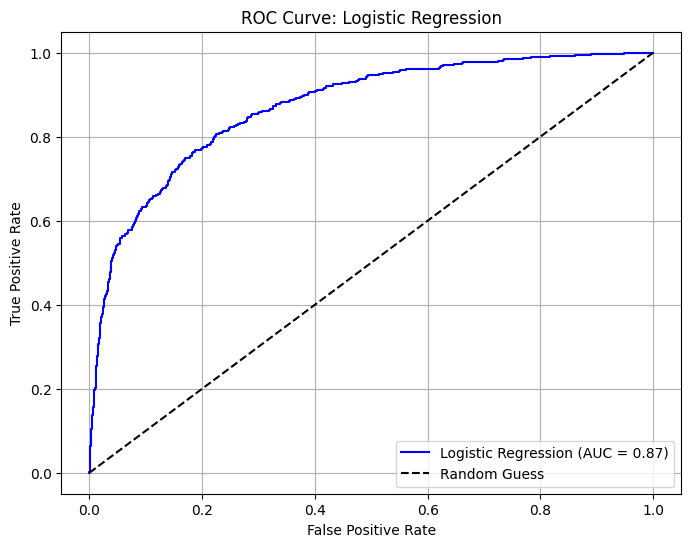

In [218]:
y_proba = logisticRegression.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


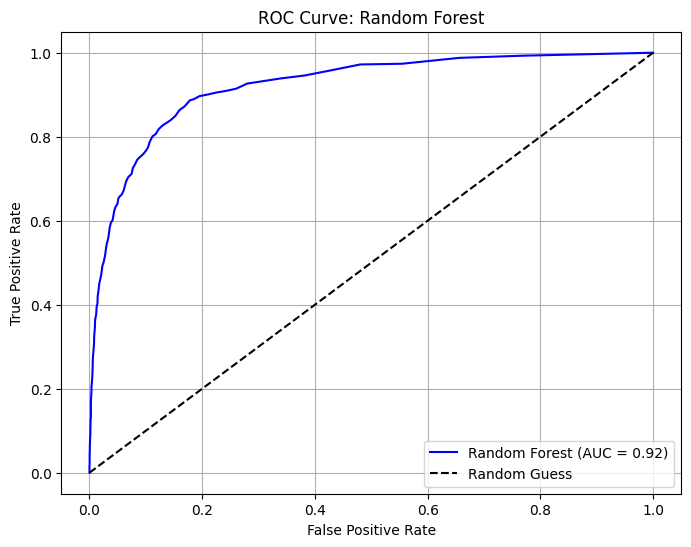

In [219]:
y_proba = randomForest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Both classifiers perform well, with the Random Forest classifier showing superiority over Logistic Regression especially with respect to catching the minority class. The Logistic Regression demonstrates good mean accuracy (87.5%), but it suffers when it comes to the positive class, exhibiting 26% recall and 0.39 F1-score; that is, it is missing many true positives. On the other hand, the Random Forest attains better mean accuracy throughout (90.3%) along with recall (56%) and F1-score (0.64), making it the preferred choice whenever missing positive cases is more important than interpretability.

                    feature  importance
8                PageValues    0.355247
7                 ExitRates    0.087738
5   ProductRelated_Duration    0.087598
4            ProductRelated    0.069551
6               BounceRates    0.058817
1   Administrative_Duration    0.057754
0            Administrative    0.041656
13              TrafficType    0.031334
12                   Region    0.029818
3    Informational_Duration    0.027868


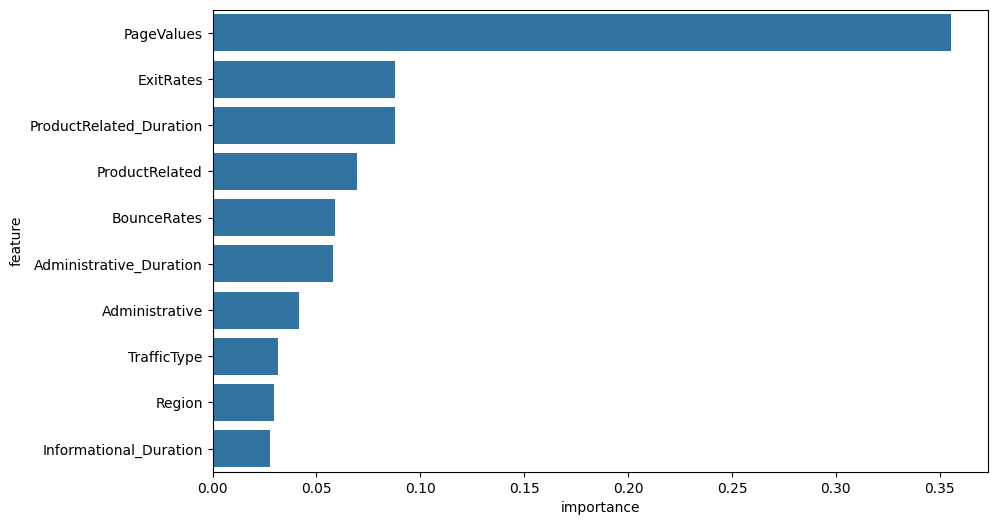

In [225]:
importances = randomForest.feature_importances_

feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.show()


It seems like, specific products with the "Pagevalues" are a good indicator. Also not leaving the page to quick is also a behavioural indicator of purchasing. And lastly the time spent looking at the product. If they spend a long time they will likelly purchase. In summary: Users who spend more time on product-related pages, visit pages with higher values, and don’t quickly exit or bounce are much more likely to make a purchase.

/var/folders/ld/0lygq5wj5d1_dsbrzzlpr1jc0000gn/T/ipykernel_4391/1653797568.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



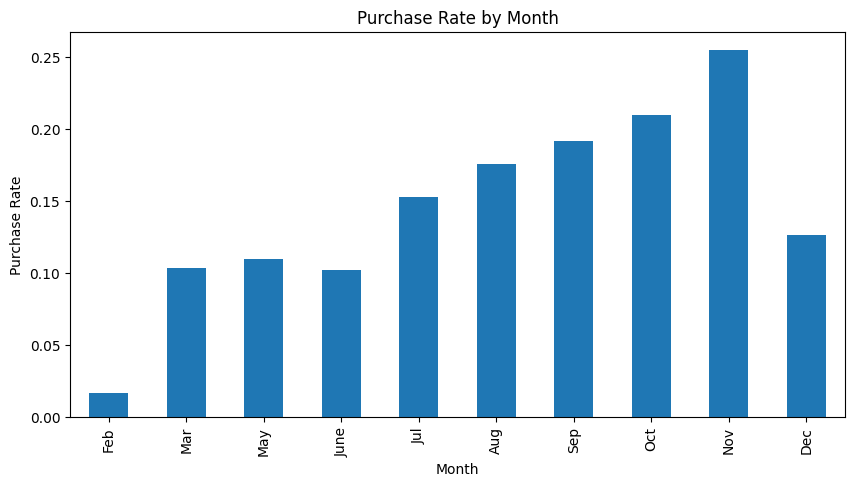

Purchase rates by Month:
Month
Feb     0.016575
Mar     0.103226
May     0.109643
June    0.101754
Jul     0.152778
Aug     0.175520
Sep     0.191964
Oct     0.209472
Nov     0.254863
Dec     0.126612
Name: Purchase, dtype: float64


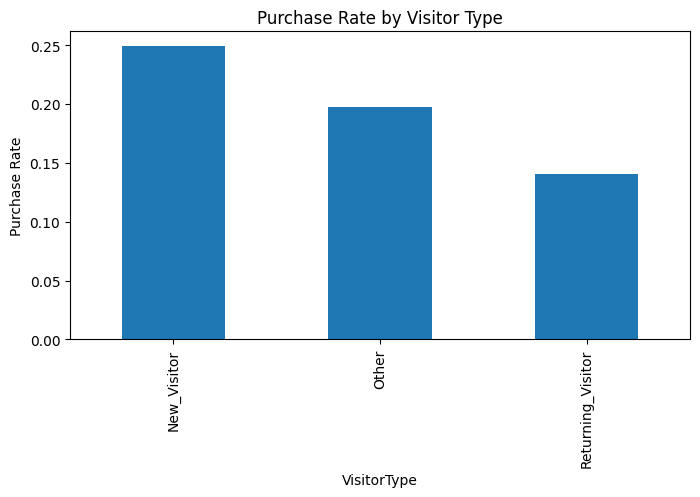

Purchase rates by VisitorType:
VisitorType
New_Visitor          0.249262
Other                0.197531
Returning_Visitor    0.140926
Name: Purchase, dtype: float64


In [227]:

df['Purchase'] = y

purchase_by_month = df.groupby('Month')['Purchase'].mean().sort_index()

plt.figure(figsize=(10,5))
purchase_by_month.plot(kind='bar')
plt.ylabel('Purchase Rate')
plt.title('Purchase Rate by Month')
plt.show()

print("Purchase rates by Month:")
print(purchase_by_month)

purchase_by_visitor = df.groupby('VisitorType')['Purchase'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
purchase_by_visitor.plot(kind='bar')
plt.ylabel('Purchase Rate')
plt.title('Purchase Rate by Visitor Type')
plt.show()

print("Purchase rates by VisitorType:")
print(purchase_by_visitor)



Purchase rates fluctuate through the months of the year. Low points of operation are in February, at about 1.7% of purchase, with a non-aggressive rise starting from May and hitting the peak in November at 25.5%. These rates probably go hand in hand with some seasons, holidays, or special events. Therefore, marketing initiatives should really gear more towards fall, especially around September, October, and November. New visitors buy the most at 24.9%, whereas returning visitors purchase the least at 14.1%. Accordingly, buying campaigns for new users may be quite efficient; however, more work may need to be put into persuading repeat visitors to make purchases.

Some strategies involving higher sales for the company could blossom into actual possibilities: First could wear more planned advertisements and offers during the higher-sale months from September to November. Second, grab their attention quickly and offer a quickly convert-to-buy kind of order with the first-time visitors who tend to buy much from a particular occasion. Third, for repeat visitors, who tend not to buy much, incentivize them with rewards or reminders. In the meantime, make the site really user-friendly and fast, such that they won't exit early from it. All of these will help convert a few visitors into actual buyers.